In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

from ImageProcessing import *
from ImageGenerator import ImageGenerator

# Creating Parameters For Image Generation

In [2]:
width, height = 16, 16
a0, a1 = np.array([5.7, 0]), np.array([0, 5.7])
lattice_offset = np.array([2, 2])
lattice_shape = np.array([3, 3])
noise_mean = 100
noise_spread = 0.2
n_bright = 10
n_dark = 1
site_spread = 1.1

im_gen = ImageGenerator(width, height, a0, a1, lattice_offset, lattice_shape, noise_mean,
                         noise_spread, n_dark, n_bright, site_spread)

In [3]:
images, labels = im_gen.make(10)


In [4]:
processor = TrainingImageProcessor(images, np.array([3, 3]), labels)
images, labels = processor.make_dataset()

# Check to see that images look correct

1


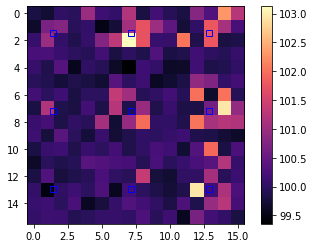

In [5]:
random_index = np.random.randint(images.shape[0])

print(labels[random_index])

processor.plot(random_index)

In [6]:
model = models.Sequential()
model.add(layers.Input(shape=(16, 16, 1)))
model.add(layers.Conv2D(8, (3, 3), strides=1, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(8, (3, 3), strides=1, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 8)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 8)           584       
                                                                 
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 865
Trainable params: 865
Non-trainable params: 0
__________________________________________________________

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
print(labels)
model.fit(images, labels, epochs=50)

[0 0 0 ... 1 1 1]
Epoch 1/50
160/160 [==============================] - 1s 4ms/step - loss: 0.7358 - binary_accuracy: 0.4787
Epoch 2/50
160/160 [==============================] - 1s 3ms/step - loss: 0.6963 - binary_accuracy: 0.5061
Epoch 3/50
160/160 [==============================] - 1s 3ms/step - loss: 0.6787 - binary_accuracy: 0.5945
Epoch 4/50
160/160 [==============================] - 0s 3ms/step - loss: 0.6503 - binary_accuracy: 0.7451
Epoch 5/50
160/160 [==============================] - 0s 3ms/step - loss: 0.6066 - binary_accuracy: 0.8324
Epoch 6/50
160/160 [==============================] - 0s 3ms/step - loss: 0.5280 - binary_accuracy: 0.8750
Epoch 7/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4212 - binary_accuracy: 0.8977
Epoch 8/50
160/160 [==============================] - 1s 3ms/step - loss: 0.3282 - binary_accuracy: 0.9094
Epoch 9/50
160/160 [==============================] - 1s 4ms/step - loss: 0.2811 - binary_accuracy: 0.9123
Epoch 10/50
160/160